In [0]:
# activate R magic
%load_ext rpy2.ipython

#**Machine Learning - Regressão**
## Problema de Negócio: Previsão de Despesas Hospitalares



*   Clínicas Médicas
*   Planos de Saúde
*   Empresas Fornecedoras de Planos






Para esta análise, vamos usar um conjunto de dados simulando despesas médicas hipotéticas 
para um conjunto de pacientes espalhados por 4 regiões do Brasil.

Esse dataset possui 1.338 observações e 7 variáveis.


---

Para que possamos criar um **Modelo Preditivo** precisamos de dados históricos para alimentar e ensinar o modelo com o que já aconteceu no passado para que ele possa encontrar a formulação matemática que representa a **relação entre as variáveis de entrada** e depois ser capaz de fazer **previsões de saída**.



##**Etapa 1 - Coletando dados**

In [13]:
%%R
  despesas <- read.csv("despesas.csv")
  head(despesas)

  idade   sexo  bmi filhos fumante   regiao   gastos
1    19 mulher 27.9      0     sim  sudeste 16884.92
2    18  homem 33.8      1     nao      sul  1725.55
3    28  homem 33.0      3     nao      sul  4449.46
4    33  homem 22.7      0     nao nordeste 21984.47
5    32  homem 28.9      0     nao nordeste  3866.86
6    31 mulher 25.7      0     nao      sul  3756.62


---

##**Etapa 2 - Explorando e Prepaparando os Dados**

### Visualizando as variáveis do dataset

In [14]:
%%R
  str(despesas)
  # variáveis categóricas datases
  # fator sexo 2
  # fator fumante 2
  # fator região 4

'data.frame':	1338 obs. of  7 variables:
 $ idade  : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sexo   : Factor w/ 2 levels "homem","mulher": 2 1 1 1 1 2 2 2 1 2 ...
 $ bmi    : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ filhos : int  0 1 3 0 0 0 1 3 2 0 ...
 $ fumante: Factor w/ 2 levels "nao","sim": 2 1 1 1 1 1 1 1 1 1 ...
 $ regiao : Factor w/ 4 levels "nordeste","norte",..: 3 4 4 1 1 4 4 1 2 1 ...
 $ gastos : num  16885 1726 4449 21984 3867 ...


### Médias de Tendência Central da variável **Gastos**, **Variável Alvo** que desejamos prever.

###**Variáveis Preditoras Independentes** são: idade, sexo, bmi, filhos, fumante, e regiao.

In [15]:
%%R # O valor dos gastos médicos dependem das demais variáveis
  summary(despesas$gastos)
  # valor mínimo de gasto 1.122
  # valor máximo de gasto 63.770
  # valor médio de gasto 13.270
  # valor mediano de gasto 9.382


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 


### Pela diferença da **Mediana** e da **Media** aparentemente não temos uma distribuição normal nesse conjunto de dados. 



---

### Construindo um Histograma de Gastos

#### Grande ocorrência de Gastos médicos até 10.000

#### Menor ocorrência de Gastos médicos acima de 40.000

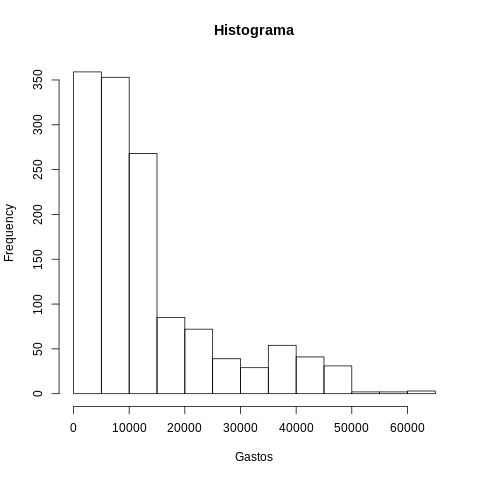

In [16]:
%%R
  hist(despesas$gastos, main = "Histograma", xlab = "Gastos")

###Tabela de contingência das regiões

####Valor da frequência das observações por região 

In [17]:
%%R
  table(despesas$regiao)
  # 325 registros no nordeste
  # 323 registros no norte
  # 325 registros no sudeste
  # 364 registros no sul


nordeste    norte  sudeste      sul 
     325      324      325      364 


### Matriz de Correlação - Explorando relacionamento entre variáveis

#### Calculando o **coeficiente de correlação** entre as **variáveis numéricas**.


In [18]:
%%R
  cor(despesas[c("idade", "bmi", "filhos", "gastos")])
  # colocamos as quatro variáveis numéricas em um vetor 

           idade        bmi     filhos     gastos
idade  1.0000000 0.10934101 0.04246900 0.29900819
bmi    0.1093410 1.00000000 0.01264471 0.19857626
filhos 0.0424690 0.01264471 1.00000000 0.06799823
gastos 0.2990082 0.19857626 0.06799823 1.00000000


#### Nenhuma das correlações deste matriz é considerada forte, algumas associações:

###### A idade e BMI parecem ter uma corr.pos fraca. Com a idade massa corporal tende a aumentar. 

###### Corelação positiva moderada entre idade e gastos, além de filhos e os gastos.

###### Estas associações implicam que a medida que idade, massa corporal e número de filhos aumenta o custo esperado de seguro saúde sobe.

### Visualizando relacionamento entre as variáveis: Scatterplot

#### pairs() conjunto de gráficos de dispersão na mesma área de plotagem. 

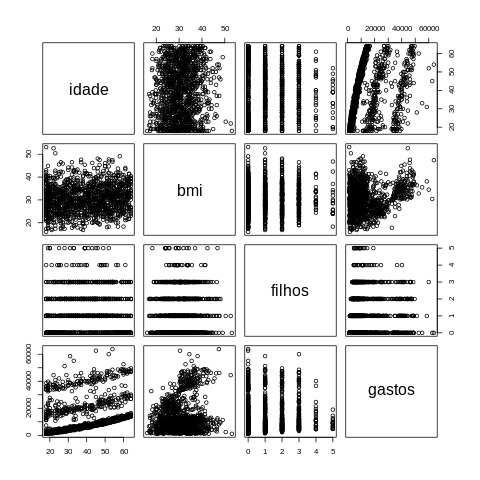

In [20]:
%%R
  pairs(despesas[c("idade", "bmi", "filhos", "gastos")])
# Perceba que não existe um claro relacionamento entre as variáveis


### Scatterplot Matrix mais completo de pairs()




In [0]:
%%R
  install.packages("psych")
  library(psych)

### Este gráfico fornece mais informações sobre o relacionamento entre as variáveis

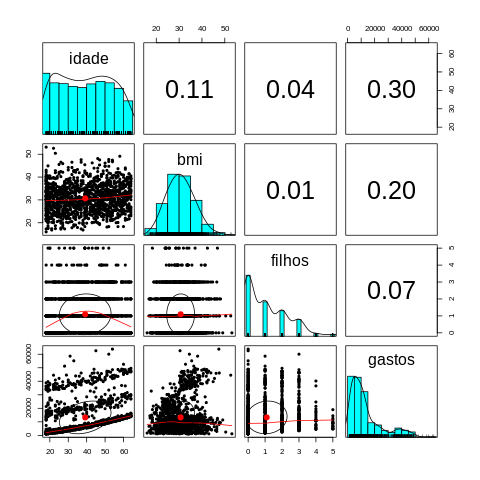

In [22]:
%%R
  pairs.panels(despesas[c("idade", "bmi", "filhos", "gastos")])

---

##**Etapa3 - Treinando modelo linear** 

Usando dados de Treino

In [0]:
?lm

In [0]:
%%R # Função para a construção de um modelo linear
  modelo <- lm(gastos ~ idade + filhos + bmi + sexo + fumante + regiao, data = despesas)
  # relacionar a variável alvo gastos - demais variáveis preditoras
  # função compreende quem é variável de saída, quem é variável de entrada e dataset

### Modelo linear simplificado - igual


In [0]:
%%R
  modelo <- lm(gastos ~ ., data = despesas)
  # todo procedimento para construir o modelo de regressão na função lm()

### Visualizando coeficientes

In [26]:
%%R
  modelo #este é o modelo de Machine Learning construído e treinado


Call:
lm(formula = gastos ~ ., data = despesas)

Coefficients:
  (Intercept)          idade     sexomulher            bmi         filhos  
     -12425.7          256.8          131.4          339.3          475.7  
   fumantesim    regiaonorte  regiaosudeste      regiaosul  
      23847.5          352.8         -606.5         -682.8  



### Prevendo Despesas Médicas

?predict

In [40]:
%%R # função para fazer as previsões com o modelo já treinado
  previsao1 <- predict(modelo) #objeto modelo é passado como parâmeto para previsões
  head(previsao1
  # Retornam as previsões do dado de Treino 
  # A diferença entre previsões do modelo e dados reais é o que chamamos de Erro do Modelo

        1         2         3         4         5         6 
25292.740  3458.281  6706.619  3751.868  5598.626  3704.606 


Acima verificamos os gastos previstos pelo modelo que devem ser iguais aos de treino

###**Atenção** - Não podemos usar os Dados de Treino para Testar o modelo, visto que estariamos apresentando aos modelo dados que o modelo já viu. Precisamos apresentar **novos conjuntos de dados**.

### Prevendo os gastos com novo dados -  **Dados de Teste** 

### Agora com o modelo já treinado não precisamos apresentar este novo dataset com **variáveis de saída**. Isso é o que desejamos que o modelo seja capaz de retornar. 

In [28]:
%%R
  despesasteste <- read.csv("despesas-teste.csv")
  head(despesasteste)

  idade   sexo  bmi filhos fumante   regiao
1    52 mulher 26.6      0     nao nordeste
2    27  homem 27.1      0     nao      sul
3    26 mulher 29.9      1     nao      sul
4    24 mulher 22.2      0     nao      sul
5    34 mulher 33.7      1     nao  sudeste
6    53 mulher 33.3      0     nao    norte


In [29]:
%%R
  previsao2 <- predict(modelo, despesasteste)
  head(previsao2)
  # a previsão para índice 1 tem como gasto previsto 10.086
  # a previsão para índice 2 tem como gasto previsto 3.020
  # a previsão para índice 3 tem como gasto previsto 4.321
  # a previsao para índice 4 tem como gasto previsto 719
  # a previsao para índice 5 tem como gasto previsto 7.741
  # a previsao para índice 6 tem como gasto previsto 12.969

         1          2          3          4          5          6 
10086.3947  3020.9027  4321.1161   719.2169  7741.4208 12969.2660 


---

##Etapa 4 - Avaliando a Performance do Modelo

### Mais detalhes sobre o Modelo

In [30]:
%%R
  summary(modelo)
  # no call do sumário temos o modelo criado
  # resíduos
  # coeficientes
  # códigos de significância
  # coeficiente de determinação - R²


Call:
lm(formula = gastos ~ ., data = despesas)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -12425.7     1000.7 -12.418  < 2e-16 ***
idade            256.8       11.9  21.586  < 2e-16 ***
sexomulher       131.3      332.9   0.395 0.693255    
bmi              339.3       28.6  11.864  < 2e-16 ***
filhos           475.7      137.8   3.452 0.000574 ***
fumantesim     23847.5      413.1  57.723  < 2e-16 ***
regiaonorte      352.8      476.3   0.741 0.458976    
regiaosudeste   -606.5      477.2  -1.271 0.203940    
regiaosul       -682.8      478.9  -1.426 0.154211    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16



In [0]:
# Equação de Regressão

# y = a + bx (simples)
 # y é nossa previsão, a coluna gastos
 # a é um dos coeficientes, o intercepto
 # b é outro coeficiente, slope, a inclinação da reta de regressão
 # x representa as variáveis preditoras de entrada

# y = a + b0x0 + b1x1 + b2...(múltipla)
          # Cada coeficiente para cada variável

----------------------------------------------------------------------------------

# Resíduos
# Diferença entre os valores observados de uma variável e seus valores previstos
# Valores observados são os dados históricos coletados usados para testes 
# Seus resíduos devem se parecer com uma distribuição normal, o que indica
# que a média entre os valores previstos e os valores observados é próximo de 0 (o que é bom)

----------------------------------------------------------------------------------

# Coeficiente - Intercept - a (alfa) - primeira linha dos coeficientes
# Valor de a na equação de regressão
# Ponto aonde a reta de regressão corta o eixo y

----------------------------------------------------------------------------------

# Coeficientes - Nomes das variáveis - b (beta)
# Valor de b na equação de regressão
# Variáveis preditoras representam o coeficiente b

# Obs: A questão é que lm() ou summary() têm diferentes convenções de 
# rotulagem para cada variável explicativa. 
# Em vez de escrever slope_1, slope_2, .... 
# Eles simplesmente usam o nome da variável em qualquer saída para 
# indicar quais coeficientes pertencem a qual variável.

----------------------------------------------------------------------------------

# Erro Padrão - Std. Error | Segunda Coluna
# Medida de variabilidade na estimativa do coeficiente a (alfa). 
# O ideal é que este valor seja menor que o valor do coeficientes 
# Porém, nem sempre este valor será menor que o valor dos coeficientes..

----------------------------------------------------------------------------------

# Asteriscos 
# Os asteriscos representam os níveis de significância de acordo com o p-value.
# Quanto mais estrelas, maior a significância.
# Atenção --> Muitos astericos indicam que é improvável que não exista 
# relacionamento entre as variáveis.

----------------------------------------------------------------------------------

# Valor t - Error t | Terceira Coluna
# Define se coeficiente da variável é significativo ou não para o modelo. 
# Ele é usado para calcular o p-value e os níveis de significância.

----------------------------------------------------------------------------------

# p-value - Pr(>|t|) | Quarta Coluna (Deve ser o menor valor possível()
# O p-value representa a probabilidade que a variável não seja relevante. 
# Se este valor for realmente pequeno, o R irá mostrar o valor como notação científica
# p-value final no final do Call

----------------------------------------------------------------------------------

# Significância
# Legendas abaixo variáveis para compreender a última coluna de coeficientes
# Espaço em branco - ruim
# Pontos - razoável
# Asteriscos - bom
# Muitos asteriscos - muito bom (idade, bmi, filhos, fumante)

# ATENÇÃO variáveis sem demarcação não são representativas na construção do modelo
# Podemos retirar essas variáveis para aumentar o nível de precisão do modelo
# Colocar no modelo variáveis que são relevantes para o modelo
# Fazer trabalho de análise exploratória

----------------------------------------------------------------------------------

# Residual Standar Error
# Este valor representa o desvio padrão dos resíduos

----------------------------------------------------------------------------------
 
# Degrees of Freedom
# É a diferença entre o número de observações na amostra de treinamento 
# e o número de variáveis no seu modelo

----------------------------------------------------------------------------------

# ATENÇÂO: Definir esta métrica de corte deve ser definida no início do projeto
# R-squared (coeficiente de determinação - R^2)
# Ajuda a avaliar o nível de precisão do nosso modelo. 
# Quanto maior, melhor, sendo 1 o valor ideal.
# Neste primeira versão do modelo estamos com R razoável de 0.7509

----------------------------------------------------------------------------------

# F-statistics - É o teste F do modelo. 
# Esse teste obtém os parâmetros do nosso modelo 
# e compara com um modelo que tenha menos parâmetros.
# Em teoria, um modelo com mais parâmetros tem um desempenho melhor. 

# O que representa a F-statistics:
# Se o seu modelo com mais parâmetros NÃO tiver perfomance
# melhor que um modelo com menos parâmetros, o valor do p-value será bem alto. 

# Se o modelo com mais parâmetros tiver performance
# melhor que um modelo com menos parâmetros, o valor do p-value será mais baixo.

# Lembre-se que correlação não implica causalidade
# Não estamos dizendo que variáveis com correlação melhor implicam necessariamente
# na causa de um gasto mairo ou menor em termos de despesas hospitalares.


---

## Etapa 5 - Otimizando a Performance do Modelo

R-squared: 0.7509

### Adicionando uma variável com o **dobro do valor das idades**

In [42]:
%%R
  despesas$idade2 <- despesas$idade ^ 2 # idade elevada ao quadrado e criar idade2
  # a idade tem uma significância forte para o modelo
  # forma de ver o relacionamento da idade com a criação do modelo
  head(despesas)

  idade   sexo  bmi filhos fumante   regiao   gastos idade2 bmi30
1    19 mulher 27.9      0     sim  sudeste 16884.92    361     0
2    18  homem 33.8      1     nao      sul  1725.55    324     1
3    28  homem 33.0      3     nao      sul  4449.46    784     1
4    33  homem 22.7      0     nao nordeste 21984.47   1089     0
5    32  homem 28.9      0     nao nordeste  3866.86   1024     0
6    31 mulher 25.7      0     nao      sul  3756.62    961     0


### Adicionando um **indicador para BMI >= 30**

In [0]:
%%R
  despesas$bmi30 <- ifelse(despesas$bmi >= 30, 1, 0)
  # aproveitar para adicionar o indicador para índice de massa corpórea 

In [44]:
%%R
  head(despesas)
  # temos duas novas variáveis além das outras já existentes
  # a ordem das variáveis após a variável alvo não tem relevância

  idade   sexo  bmi filhos fumante   regiao   gastos idade2 bmi30
1    19 mulher 27.9      0     sim  sudeste 16884.92    361     0
2    18  homem 33.8      1     nao      sul  1725.55    324     1
3    28  homem 33.0      3     nao      sul  4449.46    784     1
4    33  homem 22.7      0     nao nordeste 21984.47   1089     0
5    32  homem 28.9      0     nao nordeste  3866.86   1024     0
6    31 mulher 25.7      0     nao      sul  3756.62    961     0


## Etapa 6 - Criando Modelo Final

### Criando a versão dois do modelo

In [0]:
%%R
  modelo_v2 <- lm(gastos ~ idade + idade2 + filhos + bmi + sexo +
                   bmi30 * fumante + regiao, data = despesas)
  # bmi30 * fumante, gerando uma modificação nas variáveis

In [36]:
%%R
  summary(modelo_v2)
  # Call retorna mais variáveis que anteriormente
  # Atenção ao R² 0.8664, conseguimos uma melhora significativa
  # Adicionar variáveis assim como remover variáveis impactará na criação do modelo
  # Modelo errou menos


Call:
lm(formula = gastos ~ idade + idade2 + filhos + bmi + sexo + 
    bmi30 * fumante + regiao, data = despesas)

Residuals:
     Min       1Q   Median       3Q      Max 
-17297.1  -1656.0  -1262.7   -727.8  24161.6 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -636.9298  1361.0589  -0.468 0.639886    
idade              -32.6181    59.8250  -0.545 0.585690    
idade2               3.7307     0.7463   4.999 6.54e-07 ***
filhos             678.6017   105.8855   6.409 2.03e-10 ***
bmi                119.7715    34.2796   3.494 0.000492 ***
sexomulher         496.7690   244.3713   2.033 0.042267 *  
bmi30             -997.9355   422.9607  -2.359 0.018449 *  
fumantesim       13404.5952   439.9591  30.468  < 2e-16 ***
regiaonorte        279.1661   349.2826   0.799 0.424285    
regiaosudeste     -942.9958   350.1754  -2.693 0.007172 ** 
regiaosul         -548.8684   352.1950  -1.558 0.119372    
bmi30:fumantesim 19810.1534   604.6769  32.76

### Dados de Teste

### Carregar novamente os dados de teste para comprovar que não temos a variável gastos

In [37]:
%%R
  despesasteste <- read.csv("despesas-teste.csv")
  head(despesasteste)

  idade   sexo  bmi filhos fumante   regiao
1    52 mulher 26.6      0     nao nordeste
2    27  homem 27.1      0     nao      sul
3    26 mulher 29.9      1     nao      sul
4    24 mulher 22.2      0     nao      sul
5    34 mulher 33.7      1     nao  sudeste
6    53 mulher 33.3      0     nao    norte


In [38]:
%%R
  previsao <- predict(modelo, despesasteste)
  class(previsao)

[1] "numeric"


## Estas já são as previsões

In [39]:
%%R 
  head(previsao) # extamente as previsões feitas anteriormente
  # a previsão para índice 1 tem como gasto previsto 10.086
  # a previsão para índice 2 tem como gasto previsto 3.020
  # a previsão para índice 3 tem como gasto previsto 4.321
  # a previsao para índice 4 tem como gasto previsto 719
  # a previsao para índice 5 tem como gasto previsto 7.741
  # a previsao para índice 6 tem como gasto previsto 12.969

         1          2          3          4          5          6 
10086.3947  3020.9027  4321.1161   719.2169  7741.4208 12969.2660 


# Gravar o processo em R Markdown, Knit Pdf